<a href="https://colab.research.google.com/github/bhagirathtallapragada/T-Natural-Language-Processing-CSC8980/blob/main/exam1/exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bhagirath Tallapragada Panther id: 002575358

Question 1) (20 points) Write a generic function that takes: Classification algorithm name,
vectorization method name, training set with labels as parameters (total of 3 parameters should
be passed). The function should take the classification algorithm name, the vectorization
method’s name, and the training set and train the desired model. Use the default training
parameters for the models we have seen in class. This function should return the trained model.

In [1]:
import os
import pandas as pd
import numpy as np

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import spacy

In [ ]:
#Loading and unzipping the dataset

!unzip /content/sample_data/exam1_dataset.zip -d /content/sample_data/

In [4]:
# ! rm -rf /content/exam1_dataset

In [5]:
directory='/content/sample_data/exam1_dataset/TRAINING'
collection=[]
doc_name=[]
label=[]
for dir in os.listdir(directory):
  print(dir)
  if (dir == "negative"):
    dir1=directory+'/negative/'
    print(dir1)
    for filename in os.listdir(dir1):
      if (filename.endswith('.txt')):
        string1=(open(os.path.join(dir1, filename)))
        collection.append(string1.read())
        doc_name.append(filename.rstrip('.txt'))
        label.append(0)
  elif (dir == "positive"):
    dir1=directory+'/positive/'
    print(dir1)
    for filename in os.listdir(dir1):
      if (filename.endswith('.txt')):
        string1=(open(os.path.join(dir1, filename)))
        collection.append(string1.read())
        doc_name.append(filename.rstrip('.txt'))
        label.append(1)


negative
/content/sample_data/exam1_dataset/TRAINING/negative/
positive
/content/sample_data/exam1_dataset/TRAINING/positive/


In [6]:
print(len(label))

25000


In [7]:
#create a dataframe to store these values together for convenience

training_set=pd.DataFrame(list(zip(doc_name, collection, label)), columns =['doc_name', 'text', 'label'])

In [8]:
# training_set.head() #labels:{positive=1, negative=0} 
training_set['text']

0        I've seen about four other Japanese horror fil...
1        "54" is a film based on the infamous "Studio 5...
2        I really wish that when making a comedy, the p...
3        The only film I've ever walked out on. Amazing...
4        Trying to cash in on the success of Deal Or No...
                               ...                        
24995    Skippy from Family Ties goes from clean-cut to...
24996    This is how i felt while watching this film. I...
24997    Very rarely does one come across an indie come...
24998    I didn't at all think of it this way, but my f...
24999    My goodness. This movie really really shows th...
Name: text, Length: 25000, dtype: object

In [9]:
# Function to return the trained model

def model_trainer(algo, vm, training_set):
  model = make_pipeline(vm, algo)
  model.fit(training_set['text'],training_set['label'])

  return model

Question 2) (30 points) Using the function from question 1 to build the following models:
a) Model a: Naive Bayes, Vectorizer: TFIDF and Bag of Words, Training set should be 75%
of the provided dataset. Leaving the remaining 25% for testing.
b) Model b: RandomForest, Vectorizer: TFIDF and Bag of Words, Training set should be
70% of the provided dataset. Leaving the remaining 30% for testing.
c) Model c: Support Vector Machines (SVC in sklearn), Vectorizer: TFIDF and Bag of
Words, Training set should be 60% of the provided dataset. Leaving the remaining 40%
for testing.
NOTE: Set the random seed to: 12345. This needs to be consistently set to train the model
AND split the data in test and train. If this is not done correctly, you will lose points as your
answers will not be comparable with the grading key

a. Naive Bayes, TFIDF and bag of words

In [10]:
#splitting 75% training and 25% test
train_a, test_a = train_test_split(training_set, test_size=0.25, random_state=12345)

In [11]:
train_a.shape

(18750, 3)

In [12]:
# a. Naive Bayes, TFIDF
model_a_tf=model_trainer(MultinomialNB(),TfidfVectorizer(), train_a)

In [13]:
labels_a_tf = model_a_tf.predict(test_a['text'])

In [14]:
# # a. Naive Bayes, Bag of words
model_a_cv=model_trainer(MultinomialNB(),CountVectorizer(), train_a)

In [15]:
labels_a_cv = model_a_cv.predict(test_a['text'])

b. RandomForest, TFIDF and bag of words

In [16]:
#splitting 70% training and 30% test
train_b, test_b = train_test_split(training_set, test_size=0.3, random_state=12345)

In [17]:
model_b_tf=model_trainer(RandomForestClassifier(),TfidfVectorizer(), train_b)

In [18]:
labels_b_tf = model_b_tf.predict(test_b['text'])

In [19]:
model_b_cv=model_trainer(RandomForestClassifier(),CountVectorizer(), train_b)

In [20]:
labels_b_cv = model_b_cv.predict(test_b['text'])

c. SVM, TFIDF and bag of words

In [21]:
#splitting 60% training and 40% test
train_c, test_c = train_test_split(training_set, test_size=0.4, random_state=12345)

In [22]:
model_c_tf=model_trainer(SVC(),TfidfVectorizer(), train_c)

In [23]:
labels_c_tf = model_c_tf.predict(test_c['text'])

In [24]:
model_c_cv=model_trainer(SVC(),CountVectorizer(), train_c)

In [25]:
labels_c_cv = model_c_cv.predict(test_c['text'])

Question 3) (30 points) Using the models from Question 2, evaluate each model with its
respective training set (for model a, that set is 25% of the data, for model b, that set is 30% of
the data, and for model c that set is 40% of the data. Be careful to not mix up the evaluation
sets. With the predictions on the test set and show the following metrics: Accuracy, Precision,
Recall, and Macro F1-score. With this in mind, please write and answer these questions in your
notebook:
a) What model performs the best and why? (which metrics do you base this on, and why do
you think it performs better than others).
b) Why is it important not to mix up the testing sets between different models? Think about
this one.
c) Display in a single sorted dataframe (model name, training %, test %, accuracy,
precision, recall, F1-score) all performance metrics, sorted by accuracy in descending
manner.

Evaluating each model on the respective test sets on the metrics: Accuracy, Precision, Recall, Macro F1 Score

In [26]:
print('*** Evaluation of Model a (tfidf) ***')
print('Accuracy:', sklearn.metrics.accuracy_score(test_a['label'],labels_a_tf))
print('Precision:', sklearn.metrics.precision_score(test_a['label'],labels_a_tf))
print('Recall:', sklearn.metrics.recall_score(test_a['label'],labels_a_tf))
print('F1 Score:', sklearn.metrics.f1_score(labels_a_tf, test_a['label'], average='macro'))
print('***')

print('*** Evaluation of Model a (Bag of words) ***')
print('Accuracy:', sklearn.metrics.accuracy_score(test_a['label'],labels_a_cv))
print('Precision:', sklearn.metrics.precision_score(test_a['label'],labels_a_cv))
print('Recall:', sklearn.metrics.recall_score(test_a['label'],labels_a_cv))
print('F1 Score:', sklearn.metrics.f1_score(labels_a_cv, test_a['label'], average='macro'))
print('***')

print('*** Evaluation of Model b (tfidf) ***')
print('Accuracy:', sklearn.metrics.accuracy_score(test_b['label'],labels_b_tf))
print('Precision:', sklearn.metrics.precision_score(test_b['label'],labels_b_tf))
print('Recall:', sklearn.metrics.recall_score(test_b['label'],labels_b_tf))
print('F1 Score:', sklearn.metrics.f1_score(labels_b_tf, test_b['label'], average='macro'))
print('***')

print('*** Evaluation of Model b (Bag of words) ***')
print('Accuracy:', sklearn.metrics.accuracy_score(test_b['label'],labels_b_cv))
print('Precision:', sklearn.metrics.precision_score(test_b['label'],labels_b_cv))
print('Recall:', sklearn.metrics.recall_score(test_b['label'],labels_b_cv))
print('F1 Score:', sklearn.metrics.f1_score(labels_b_cv, test_b['label'], average='macro'))
print('***')

print('*** Evaluation of Model c (tfidf) ***')
print('Accuracy:', sklearn.metrics.accuracy_score(test_c['label'],labels_c_tf))
print('Precision:', sklearn.metrics.precision_score(test_c['label'],labels_c_tf))
print('Recall:', sklearn.metrics.recall_score(test_c['label'],labels_c_tf))
print('F1 Score:', sklearn.metrics.f1_score(labels_c_tf, test_c['label'], average='macro'))
print('***')

print('*** Evaluation of Model c (Bag of words) ***')
print('Accuracy:', sklearn.metrics.accuracy_score(test_c['label'],labels_c_cv))
print('Precision:', sklearn.metrics.precision_score(test_c['label'],labels_c_cv))
print('Recall:', sklearn.metrics.recall_score(test_c['label'],labels_c_cv))
print('F1 Score:', sklearn.metrics.f1_score(labels_c_cv, test_c['label'], average='macro'))
print('***')

*** Evaluation of Model a (tfidf) ***
Accuracy: 0.8624
Precision: 0.8710659898477158
Recall: 0.8431051424828038
F1 Score: 0.8621933950460794
***
*** Evaluation of Model a (Bag of words) ***
Accuracy: 0.84688
Precision: 0.8672039243167484
Recall: 0.8106780216180806
F1 Score: 0.8464174378276605
***
*** Evaluation of Model b (tfidf) ***
Accuracy: 0.8404
Precision: 0.8348202216815356
Recall: 0.8405008165487208
F1 Score: 0.8403542235248219
***
*** Evaluation of Model b (Bag of words) ***
Accuracy: 0.8378666666666666
Precision: 0.8251322751322752
Recall: 0.8489384866630375
F1 Score: 0.8378605673415198
***
*** Evaluation of Model c (tfidf) ***
Accuracy: 0.8931
Precision: 0.8858447488584474
Recall: 0.9003228410008071
F1 Score: 0.8930999476189743
***
*** Evaluation of Model c (Bag of words) ***
Accuracy: 0.851
Precision: 0.8400706436420722
Recall: 0.8638014527845036
F1 Score: 0.850995970931054
***


a. What model performs the best and why? (which metrics do you base this on, and why do you think it performs better than others)

Ans. Approaching this question from the context of domain, since the dataset is a movie review dataset, relying simply on accuracy is not advisable as we need to appreciate what is the actual cost of having misclassified reviews.

In the case of movie reviews, both false-positives and false-negatives seem to have a similar impact on the end result. A positive review classified as a negative can lead to equal disappointment for the end user as a negative review misclassfied as positive (if used in a generic scenario like a movie recommender, let's say). The risk is localized to the individual, therefore has equal priority for both errors in classification.

We can juxtapose this with another classification scenario such as classifying if a candidate is a criminal or not. A real criminal misclassified as innocent has significantly higher risk to a larger population, than the opposite case.

Bearing the above in mind, I would consider a balance between precision and recall to be of high importance in evaluating the given models. Therefore, I elect to consider a good score for precision, recall and F1 score (in the same order of precedence) as good metrics to evaluate the models.

Therefore, the SVM model using the tfidf vectorizer is the best performing model with precision of 0.88, recall of 0.90 and a F1 score of 0.89.

b. Why is it important not to mix up the testing sets between different models? Think about this one.

Ans. It is important to not mix up the testing sets between different models due to the fact that we are using different split percentage of training and test data to train various models. 

Due to this, mixing the test sets can result in a mix up of samples from the training data creeping into the test set for certain models.

For example: the SVM model only uses 60% of data for training. So if the test set of this model is used to evaluate another model like Naive Bayes where the training data is 75%, a lot of samples of the test set of SVM will already be existing in the training set of Naive Bayes model.

This can result in problems like overfitting and erroneous evaluation of Naive Bayes model's performance in the above example.

c. Sorted dataframe with the metrics in descending order based on accuracy 

In [27]:
# prepare data to insert into the columns of the dataframe

lacc=[sklearn.metrics.accuracy_score(test_a['label'],labels_a_tf),
sklearn.metrics.accuracy_score(test_a['label'],labels_a_cv),
sklearn.metrics.accuracy_score(test_b['label'],labels_b_tf),
sklearn.metrics.accuracy_score(test_b['label'],labels_b_cv),
sklearn.metrics.accuracy_score(test_c['label'],labels_c_tf),
sklearn.metrics.accuracy_score(test_c['label'],labels_c_cv)]

lpre=[
sklearn.metrics.precision_score(test_a['label'],labels_a_tf),
sklearn.metrics.precision_score(test_a['label'],labels_a_cv),
sklearn.metrics.precision_score(test_b['label'],labels_b_tf),
sklearn.metrics.precision_score(test_b['label'],labels_b_cv),
sklearn.metrics.precision_score(test_c['label'],labels_c_tf),
sklearn.metrics.precision_score(test_c['label'],labels_c_cv)]

lre=[sklearn.metrics.recall_score(test_a['label'],labels_a_tf),
sklearn.metrics.recall_score(test_a['label'],labels_a_cv),
sklearn.metrics.recall_score(test_b['label'],labels_b_tf),
sklearn.metrics.recall_score(test_b['label'],labels_b_cv),
sklearn.metrics.recall_score(test_c['label'],labels_c_tf),
sklearn.metrics.recall_score(test_c['label'],labels_c_cv)]

lf1=[sklearn.metrics.f1_score(labels_a_tf, test_a['label'], average='macro'),
sklearn.metrics.f1_score(labels_a_cv, test_a['label'], average='macro'),
sklearn.metrics.f1_score(labels_b_tf, test_b['label'], average='macro'),
sklearn.metrics.f1_score(labels_b_cv, test_b['label'], average='macro'),
sklearn.metrics.f1_score(labels_c_tf, test_c['label'], average='macro'),
sklearn.metrics.f1_score(labels_c_cv, test_c['label'], average='macro')]

lmod=['Naive Bayes_BoW','Naive Bayes_BoW','RandomForestClassifier_tfidf','RandomForestClassifier_BoW','SVM_tfidf','SVM_BoW']
ltr=['75%', '75%', '70%', '70%','60%', '60%']
ltest=['25%', '25%', '30%','30%','40%', '40%']

In [28]:
# Creating a dataframe
metrics_df=pd.DataFrame({'Training %':ltr, 'Test %':ltest, 'Accuracy':lacc, 'Precision':lpre, 'Recall':lre, 'F1 Score':lf1}, index=lmod)

In [29]:
#sorting the values based on Accuracy score
metrics_df.sort_values(by='Accuracy', ascending=False)

,Training %,Test %,Accuracy,Precision,Recall,F1 Score
SVM_tfidf,60%,40%,0.893100,0.885845,0.900323,0.893100
Naive Bayes_BoW,75%,25%,0.862400,0.871066,0.843105,0.862193
SVM_BoW,60%,40%,0.851000,0.840071,0.863801,0.850996
Naive Bayes_BoW,75%,25%,0.846880,0.867204,0.810678,0.846417
RandomForestClassifier_tfidf,70%,30%,0.840400,0.834820,0.840501,0.840354
RandomForestClassifier_BoW,70%,30%,0.837867,0.825132,0.848938,0.837861


Question 4) (15 points) Using the documents in the folder named UNLABELED, please use
your best performing trained model from question 3 to predict their labels. Please do this
individually for each document. Print to the screen the following items: Document Name,
Predicted Label and using a text cell, write your own opinion if the label is correct and why -
note you have to read the document to make your own opinion.

In [30]:
directory='/content/sample_data/exam1_dataset/UNLABELED/'
collection1=[]
doc_name1=[]
for filename in os.listdir(directory):
 if (filename.endswith('.txt')):
   string2=(open(os.path.join(directory, filename)))
   collection1.append(string2.read())
   doc_name1.append(filename.rstrip('.txt'))

In [31]:
# Loading the unlabeled data into a dataframe
t_set=pd.DataFrame(list(zip(doc_name1, collection1)), columns =['doc_name', 'text'])

In [32]:
t_set.shape

(11, 2)

Label 0 is for negative class, label 1 is for positive class

In [33]:
print('document name: {0}'.format(t_set.iloc[0,0]))
# print(t_set.iloc[0,1])
outcome=model_c_tf.predict([t_set.iloc[0,1]])
print('Predicted label: {0}'.format(outcome))

document name: 46278_0
Predicted label: [1]


This is a correct label for document 0_0 as the review talks about a number of positive features about films before 1933 by singling out a few classics of the time and their qualities despite not being a huge fan pre 1933 films.

In [34]:
print('document name: {0}'.format(t_set.iloc[1,0]))
# print(t_set.iloc[1,1])
outcome=model_c_tf.predict([t_set.iloc[1,1]])
print('Predicted label: {0}'.format(outcome))

document name: 36517_0
Predicted label: [0]


This is a correct label for document 36517_0 as the review is outright negative and full of negative comments and words. There is not one positive view in the entire document.

In [35]:
print('document name: {0}'.format(t_set.iloc[2,0]))
# print(t_set.iloc[2,1])
outcome=model_c_tf.predict([t_set.iloc[2,1]])
print('Predicted label {0}'.format(outcome))

document name: 24221_0
Predicted label [0]


This is a correct label for document 46705_0 as this review is also encapsulating only the shortcomings of the 'zombie film' in both the creative and technical aspects. This is apparently despite the reviewer having high tolerance for bad films.

In [36]:
print('document name: {0}'.format(t_set.iloc[3,0]))
# print(t_set.iloc[3,1])
outcome=model_c_tf.predict([t_set.iloc[3,1]])
print('Predicted label {0}'.format(outcome))

document name: 46705_0
Predicted label [0]


This is a correct label for document 36022_0 as this review mentions negative aspects on the technical front while commenting that the performer had better luck with another film than this one.

In [37]:
print('document name: {0}'.format(t_set.iloc[4,0]))
# print(t_set.iloc[4,1])
outcome=model_c_tf.predict([t_set.iloc[4,1]])
print('Predicted label {0}'.format(outcome))

document name: 37154_0
Predicted label [0]


This is a correct label for document 36149_0 as the reviewer is clearly disgusted by the filming and costumes etc.

In [38]:
print('document name: {0}'.format(t_set.iloc[5,0]))
# print(t_set.iloc[5,1])
outcome=model_c_tf.predict([t_set.iloc[5,1]])
print('Predicted label {0}'.format(outcome))

document name: 0_0
Predicted label [1]


This is a difficult choice of label for document 35968_0 as the review is both defensive of the maker of the film in comparison to his earlier works as well as disappointed by the lacklustre result in the current film. The reviewer is clearky disappointed yet passes the film as watchable 'in the moment' or as one to forget in the long run. Therefore the review is very reserved yet passes as positive.

In [39]:
print('document name: {0}'.format(t_set.iloc[6,0]))
# print(t_set.iloc[6,1])
outcome=model_c_tf.predict([t_set.iloc[6,1]])
print('Predicted label {0}'.format(outcome))

document name: 36022_0
Predicted label [0]


This is a correct label for document 49990_0 as the reviewer is not impressed at all by the film. This is made evident in words like boredom, wasted hour etc. It shows the movie did not fulfil its promise.

In [40]:
print('document name: {0}'.format(t_set.iloc[7,0]))
# print(t_set.iloc[7,1])
outcome=model_c_tf.predict([t_set.iloc[7,1]])
print('Predicted label {0}'.format(outcome))

document name: 36149_0
Predicted label [0]


This is a correct review for document 24221_0 as the work mentioned contains a number of sub topics within and despite some of them being funny enough, all of them suffer from long and unnecessary passages for characters. The reviewer weighs the negative more over the positives.

In [41]:
print('document name: {0}'.format(t_set.iloc[8,0]))
# print(t_set.iloc[8,1])
outcome=model_c_tf.predict([t_set.iloc[8,1]])
print('Predicted label {0}'.format(outcome))

document name: 35991_0
Predicted label [0]


This is a correct label for  35991_0 as the review has outright negative words such as bad, poor etc. This opinion does not change as the review progresses.

In [42]:
print('document name: {0}'.format(t_set.iloc[9,0]))
# print(t_set.iloc[9,1])
outcome=model_c_tf.predict([t_set.iloc[9,1]])
print('Predicted label {0}'.format(outcome))

document name: 49990_0
Predicted label [0]


This is an interesting label choice for document 46278_0 as the review does not speak anything about the quality of the film itself. It is a neutral sentence with some personal postives for the reviewer which are not related to the film. The model does a good job in not mistaking this as a positive review 

In [43]:
print('document name: {0}'.format(t_set.iloc[10,0]))
# print(t_set.iloc[10,1])
outcome=model_c_tf.predict([t_set.iloc[10,1]])
print('Predicted label {0}'.format(outcome))

document name: 35968_0
Predicted label [0]


This is a correct label for document 37154 as the review expresses disappointment through words like lame, senseless etc. Even though the reviewer gives three stars, the content of the document conveys negative tone.

Question 5) (20 points) Build a function that takes the set of documents as input and returns a
cosine similarity matrix for those documents. Feed all documents in the TRAINING folder to this
matrix. Instead of printing the returned cosine similarity matrix, create a heatmap plot from the
returned matrix. Make sure your plot is nicely scaled, properly labeled, and uses a nice color
range to show the similarity

In [2]:
# preparing the documents into a list to input to the given function
directory='/content/sample_data/exam1_dataset/TRAINING'
collection3=[]
doc_name3=[]
for dir in os.listdir(directory):
  dir1=directory+'/'+dir+'/'
  for filename in os.listdir(dir1):
    if (filename.endswith('.txt')):
      string3=(open(os.path.join(dir1, filename)))
      collection3.append(string3.read())
      doc_name3.append(filename.rstrip('.txt'))

In [3]:
print(collection3[0])
print(doc_name3[0])

I've seen about four other Japanese horror films and they weren't too impressive. However, I could sense that there was a sensible script guiding the way.<br /><br />Not here, no way. This is about a detective who is trying to tie together similar murders that have been happening. When he finds a suspect to question, the suspect freaks out because they keep seeing a ghost. Then, the ghost starts to follow the detective around FOR A REASON THAT IS NEVER EXPLAINED AND TAKES UP MORE THAN HALF OF THE MOVIE.<br /><br />Bad enough? Oh no. The film keeps switching perspectives to different characters who don't have much to do with the story. I've seen this before in other movies where it shows a different perspective. Not the case here.<br /><br />Also, whatever is happening on screen that is actually tolerable quickly ends. For example, there a few scenes with a slight instrumental score that builds up and...then it just cuts to another scene. I'm aware that this can be a dramatic effect. Th

In [4]:
# defining the function to generate cosine similarity matrix
# Due to the RAM constraints of Colab, to generate the cosine similarity matrix, I am reducing the precision of the numpy matrix generated 
# by TfidfVectorizer() to float32 instead of default float64 in the following function:

def cosine_sim_creator(collection):
  tfIdfVectorizer1=TfidfVectorizer()
  tfIdf = tfIdfVectorizer1.fit_transform(collection)
  tfIdf=tfIdf.astype(np.float32)
  csmat=cosine_similarity(tfIdf)

  return csmat

In [5]:
cs1=cosine_sim_creator(collection3)

In [48]:
print(cs1.shape)
print(cs1.dtype)

(25000, 25000)
float32


In [49]:
# To check the values of the cosine similarity matrix: convert the retrieved numpy array into a dataframe
# for better visualization

# dftest=pd.DataFrame(cs1)
# dftest

Generating the heatmap for the retrieved cosine similarity matrix: 

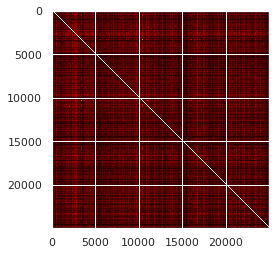

In [50]:
plt.imshow(cs1, cmap='hot', interpolation='nearest')
plt.show()

In [51]:
#  dftest = pd.DataFrame(cs1)
# mask = np.triu(np.ones_like(cs1))
# # plotting a triangle correlation heatmap 
# dataplot = sns.heatmap(dftest, mask=mask) 
  
# # displaying heatmap 
# plt.show() 

In [52]:
# fig, ax = plt.subplots(1, 1, figsize = (24, 18))
# im = ax.imshow(cs1,cmap='hot')

# ax.set_xticks(np.arange(len(doc_name3)))
# ax.set_yticks(np.arange(len(doc_name3)))
# ax.set_xticklabels(doc_name3)
# ax.set_yticklabels(doc_name3)

# # Rotate the tick labels and set their alignment.
# # plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
# #          rotation_mode="anchor")


# ax.set_title("Heatmap of cosine similarity matrix")
# # fig.tight_layout()
# plt.show()

Question 6) (15 points) Write a function that takes a cosine similarity matrix as input and
returns a list with the top n document paris and their similarity. Note that you should only keep
the document pairs that are unique and remove the comparisons of the document to itself. Print
the top 50 similar document pairs. Compare the assigned class for each document and answer:
Do all similar documents belong to the same class? Why or why not?


In [53]:
# approach 1, causes colab to crash due to heavy volume of dataset

def top_n_similar(input_mat,n):
  #pairs=[]
  #sim=[]
  #top_sim=[]
  fin=[]
  #input_mat=np.tril(input_mat)
  dim=len(input_mat)
  for col in range(0,(dim-1)):
    for row in range(col,dim):
      if (col==row):
        continue
      else:
        #pairs.append([d1,d2])
        #sim.append(input_mat[d1][d2])
        #pair=(d1,d2)
        #sim=input_mat[d1][d2]
        fin.append(((row,col),input_mat[row][col]))  
  # fin=list(zip(pairs,sim))
  sorted(fin,key=itemgetter(1), reverse=True)
  return fin[:n]

In [54]:
# d=top_n_similar(cs1,50)
# d

In [6]:
# approach two: reduce the precision further to enable processing in colab, use numpy methods to sort find the n most similar indices in cs1

cs2=cs1.astype(np.float16)
# cs2.dtype

def top_n_similar(cs,n):
  np.fill_diagonal(cs,0)
  largest_ind = (-1*cs.ravel()).argsort()[:n]
  ind = np.unravel_index(largest_ind, cs.shape)

  return list(zip(list(ind[0]),list(ind[1])))

In [7]:
ind=top_n_similar(cs2,50)

In [8]:
# returning the indices of 50 most similar documents
ind

[(19348, 15972),
 (5864, 5882),
 (8493, 10413),
 (4581, 11581),
 (5882, 5864),
 (5639, 3974),
 (19262, 24555),
 (14465, 18669),
 (9212, 7609),
 (18653, 13232),
 (7987, 10938),
 (2418, 12320),
 (2239, 81),
 (14850, 17749),
 (13232, 18653),
 (6048, 4811),
 (11468, 11125),
 (12320, 2418),
 (3395, 282),
 (16102, 14934),
 (1461, 12363),
 (2241, 2216),
 (4417, 2330),
 (6711, 5498),
 (2312, 1682),
 (14510, 17958),
 (5815, 3396),
 (21543, 18041),
 (10413, 2099),
 (15972, 19348),
 (22394, 14899),
 (820, 6040),
 (9392, 1889),
 (9212, 1458),
 (7469, 4307),
 (13215, 20635),
 (2216, 2241),
 (24249, 18993),
 (12363, 1461),
 (5763, 10490),
 (9701, 11000),
 (24555, 19262),
 (4388, 2649),
 (1682, 2312),
 (592, 12272),
 (7841, 396),
 (6946, 4014),
 (1403, 10252),
 (8316, 7884),
 (1145, 10418)]

Question 7) (20 points) Using Spacy’s part of speech tagger, process all sentences (hint: don’t
forget to split the reviews) and count how many NOUN and VERB tags are found in all the
movies review (TRAINING folder) separating them by label. In other words, how many NOUN
and VERB tags are found in positive reviews, and how many NOUN and VERB tags are found
in negative reviews. Answer the following question: When comparing both, do you see any
differences? Why do you think about the differences? Or lack of them.

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
directory='/content/sample_data/exam1_dataset/TRAINING'
collection=[]
doc_name=[]
label=[]
for dir in os.listdir(directory):
  #print(dir)
  if (dir == "negative"):
    dir1=directory+'/negative/'
    # print(dir1)
    for filename in os.listdir(dir1):
      if (filename.endswith('.txt')):
        string1=(open(os.path.join(dir1, filename)))
        collection.append(string1.read())
        doc_name.append(filename.rstrip('.txt'))
        label.append(0)
  elif (dir == "positive"):
    dir1=directory+'/positive/'
    # print(dir1)
    for filename in os.listdir(dir1):
      if (filename.endswith('.txt')):
        string1=(open(os.path.join(dir1, filename)))
        collection.append(string1.read())
        doc_name.append(filename.rstrip('.txt'))
        label.append(1)


In [ ]:
tags=[]
tagged=[]
for text in collection:
  doc=nlp(text)
  for token in doc:
    tags.append(token.pos_)
  tagged.append(tags)

In [ ]:
# print(len(tagged))
#create a dataframe in the same way as Q1 to store the values together for convenience
training_set=pd.DataFrame(list(zip(doc_name, collection, tagged, label)), columns =['doc_name', 'text', 'tags', 'label'])

In [ ]:
training_set.head()

In [ ]:
# The below code took over half hour to execute over the entire dataset, hence for vaidation of logic, I am looping over first 100 samples


# counting number of nouns and verbs for label 0 and 1 respectively
count_n0=0
count_v0=0
count_n1=0
count_v1=0

# for i in range(len(training_set)): # changed for validation purposes
for i in range(0,100):
  if (training_set.iloc[i]['label'] == 0):
    for j in training_set.iloc[i]['tags']:
      if (j == 'NOUN'):
        count_n0+=1
      elif (j == 'VERB'):
        count_v0+=1
  elif (training_set.iloc[i]['label'] == 1):
    for j in training_set.iloc[i]['tags']:
      if (j == 'NOUN'):
        count_n1+=1
      elif (j == 'VERB'):
        count_v1+=1


In [ ]:
print('count of nouns in label 0 {0}'.format(count_n0))
print('count of verbs in label 0 {0}'.format(count_v0))
print('count of nouns in label 1 {0}'.format(count_n1))
print('count of verbs in label 1 {0}'.format(count_v1))

Question 8) (20 points) Using the results from the PoS process in question 7, count how many
different PUNCT tags are found and their respective counts from the full dataset provided (both
negative and positives together). Using regex, write a set of regular expressions that generate
the same counts from the dataset without using NLTK or Spacy, just regex. Can you get the
same counts? If not, why do you think this is?


Bonus Question: (40 points) Using the code from Class 09 - Word Embeddings, pre-tune
BERT in order to classify movie reviews. You can use the full TRAINING folder for the tuning
and use the UNLABELED folder for your final classification/prediction task. Do the label
predictions from BERT match what your classifier from Question 4 predicted? If they don’t, are
they better? Please say why.